In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import networkx as nx
import random
import pickle
import itertools
import urllib.request as urllib
import io
import zipfile
import re
import time
import datetime 
import dynetx as dn
import copy
import ast
import glob
import scipy

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from tensorflow import keras
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras import layers
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.linalg import diag
from tensorflow.keras import callbacks
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score
from networkx.generators.community import LFR_benchmark_graph
from itertools import count
from rdyn import RDyn
from datetime import datetime
from sklearn.decomposition import PCA

from helpers import *
from Autoencoder import *

In [2]:
path = './graphs/DANCer_graphs_simple_4_built/'

In [3]:
graphs = []
for i in range(5):
    graphs.append(pickle.load(open(path + 't' + str(i) + '.p', 'rb')))

In [4]:
#t1 data
t1 = graphs[0]

t1_A = create_adjacency_matrix(t1)
t1_B = tf.convert_to_tensor(nx.modularity_matrix(t1).astype('float32'))
t1_S = tf.convert_to_tensor(adjacency_to_similarity(t1_A).astype('float32'))

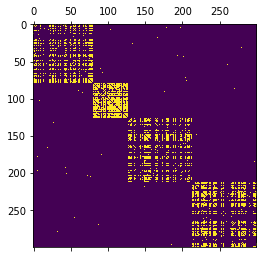

In [5]:
#visualize graph adjacency structure
n0 = [x for x,y in t1.nodes(data=True) if y['gt']==0]
n1 = [x for x,y in t1.nodes(data=True) if y['gt']==1]
n2 = [x for x,y in t1.nodes(data=True) if y['gt']==2]
n3 = [x for x,y in t1.nodes(data=True) if y['gt']==3]
n4 = [x for x,y in t1.nodes(data=True) if y['gt']==4]

n = n0 + n1 + n2 + n3 + n4
plt.matshow(nx.to_numpy_matrix(t1, dtype=np.bool, nodelist=n))

In [6]:
t2 = graphs[1]

t2_A = create_adjacency_matrix(t2)
t2_B = tf.convert_to_tensor(nx.modularity_matrix(t2).astype('float32'))
t2_S = tf.convert_to_tensor(adjacency_to_similarity(t2_A).astype('float32'))

In [7]:
t1_H = pickle.load(open('./trained/DANCer_graphs_simple_4/latent_space/t1_H', 'rb'))

In [ ]:
t1_static = Autoencoder(300, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())
history_t1_static = train(t1_static, 5000, 300, t1_S)

In [14]:
t1_H = t1_static.encoder(t1_S)

In [12]:
t2_dynamic = Autoencoder(300, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer(), c=get_num_communities(t2, 'gt'), c_old=get_num_communities(t1, 'gt'), subspace_distance=1)
t2_dynamic.set_past_embedding(t1_H)

In [13]:
history_t2_dynamic = train(t2_dynamic, 5000, 300, t2_S)

In [8]:
t2_static = Autoencoder(300, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer())

In [9]:
history_t2_static = train(t2_static, 5000, 300, t2_S)

In [9]:
t2_dynamic_2 = Autoencoder(300, 128, k_reg=tf.keras.regularizers.L2(), act_reg=SparseRegularizer(), )
t2_dynamic_2.set_past_embedding(t1_H)

In [ ]:
history_t2_dynamic_2 = train(t2_dynamic_2, 5000, 300, t2_S)

In [14]:
#evaluation
graph = t2
ae = t2_dynamic
data = t2_S
num_iter = 50


H = ae.encoder(data)
labels = graph_labels(graph)
average = 0
for i in range(num_iter):
    kmeans = KMeans(n_clusters=get_num_communities(graph, 'gt'), n_init=20).fit(H)
    average += normalized_mutual_info_score(labels, kmeans.labels_)
average /= num_iter
average

0.5991678228718051

In [10]:
history_t2_dynamic

{0: <tf.Tensor: shape=(), dtype=float32, numpy=1.879294>,
 1: <tf.Tensor: shape=(), dtype=float32, numpy=1.6300058>,
 2: <tf.Tensor: shape=(), dtype=float32, numpy=1.6225156>,
 3: <tf.Tensor: shape=(), dtype=float32, numpy=1.6181902>,
 4: <tf.Tensor: shape=(), dtype=float32, numpy=1.6121318>,
 5: <tf.Tensor: shape=(), dtype=float32, numpy=1.5919355>,
 6: <tf.Tensor: shape=(), dtype=float32, numpy=1.6067905>,
 7: <tf.Tensor: shape=(), dtype=float32, numpy=1.5983555>,
 8: <tf.Tensor: shape=(), dtype=float32, numpy=1.5987499>,
 9: <tf.Tensor: shape=(), dtype=float32, numpy=1.5897962>,
 10: <tf.Tensor: shape=(), dtype=float32, numpy=1.5961138>,
 11: <tf.Tensor: shape=(), dtype=float32, numpy=1.5887717>,
 12: <tf.Tensor: shape=(), dtype=float32, numpy=1.5898389>,
 13: <tf.Tensor: shape=(), dtype=float32, numpy=1.5859644>,
 14: <tf.Tensor: shape=(), dtype=float32, numpy=1.5855608>,
 15: <tf.Tensor: shape=(), dtype=float32, numpy=1.5841535>,
 16: <tf.Tensor: shape=(), dtype=float32, numpy=1.5